# Libraries and constants

In [19]:
library(ggplot2)
library(glue)
library(tidyverse)
library(scales)
library(grid)
library(ggpubr)
library(comprehenr)

std_width  <- 12
std_height <- 7
options(repr.plot.width = std_width, repr.plot.height = std_height)

colors <- c(
    "#fd7f6f",
    "#7eb0d5",
    "#b2e061",
    "#bd7ebe",
    "#ffb55a",
    "#8bd3c7"
)

fontsize <- 22

---

# Exercise 1

A set of measurements have been performed on the concentration of a contaminant in tap water. The following tables reports a set of values (x), with the corresponding probabilities given by the two methods (p1 and p2)

| x  | 15.58 | 15.9 | 16   | 16.1 | 16.2 |
|----|-------|------|------|------|------|
| p1 | 0.15  | 0.21 | 0.35 | 0.15 | 0.14 |
| p2 | 0.14  | 0.05 | 0.64 | 0.08 | 0.09 |

Evaluate the expected values, E[X], and the variance, V ar(X), for both methods

We compute the expected values as 

$$
 E[X] = \sum_i x_i p(x_i)
$$

and variances as 

$$
var[X] = E[X^2] - (E[X])^2
$$

In [3]:
# ---- DATA ---- #
x  <- c(15.58, 15.90, 16.00, 16.10, 16.20)
p1 <- c(0.15,  0.21,  0.35,  0.15,  0.14)
p2 <- c(0.14,  0.05,  0.64,  0.08,  0.09)

data <- tibble(
    "x"  = x,
    "p1" = p1,
    "p2" = p2
)
# ---- ---- ---- #

# compute expected val. and variance
m1 <- sum(data[, "x"]   * data[, "p1"])
m2 <- sum(data[, "x"]   * data[, "p2"])
v1 <- sum(data[, "x"]^2 * data[, "p1"]) - m1^2
v2 <- sum(data[, "x"]^2 * data[, "p2"]) - m2^2

cat("\np1 : E[X]   =\t", m1)
cat("\np1 : Var[X] =\t", v1)
cat("\np2 : E[X]   =\t", m2)
cat("\np2 : Var[X] =\t", v2)


p1 : E[X]   =	 15.959
p1 : Var[X] =	 0.033979
p2 : E[X]   =	 15.9622
p2 : Var[X] =	 0.02816716

---

# Exercise 2

The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribu- tion follows an exponential pdf with rate 1/30.

A) Simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram.

B) What is the probability that a person will wait for less than 10 minutes?

C) Evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R).

D) What is the probability for waiting more than one hour before being received?

## A) 

Considering 1 minute as our minimum time step, or time unit, and considering being received by the doctor to be a poisson process, the waiting time thus follows an exponential distribution with rate $\lambda=1/3$. 

To simulate the waiting time for 50 people we simply use the `rexp(N=50, rate=1/3)` function. 

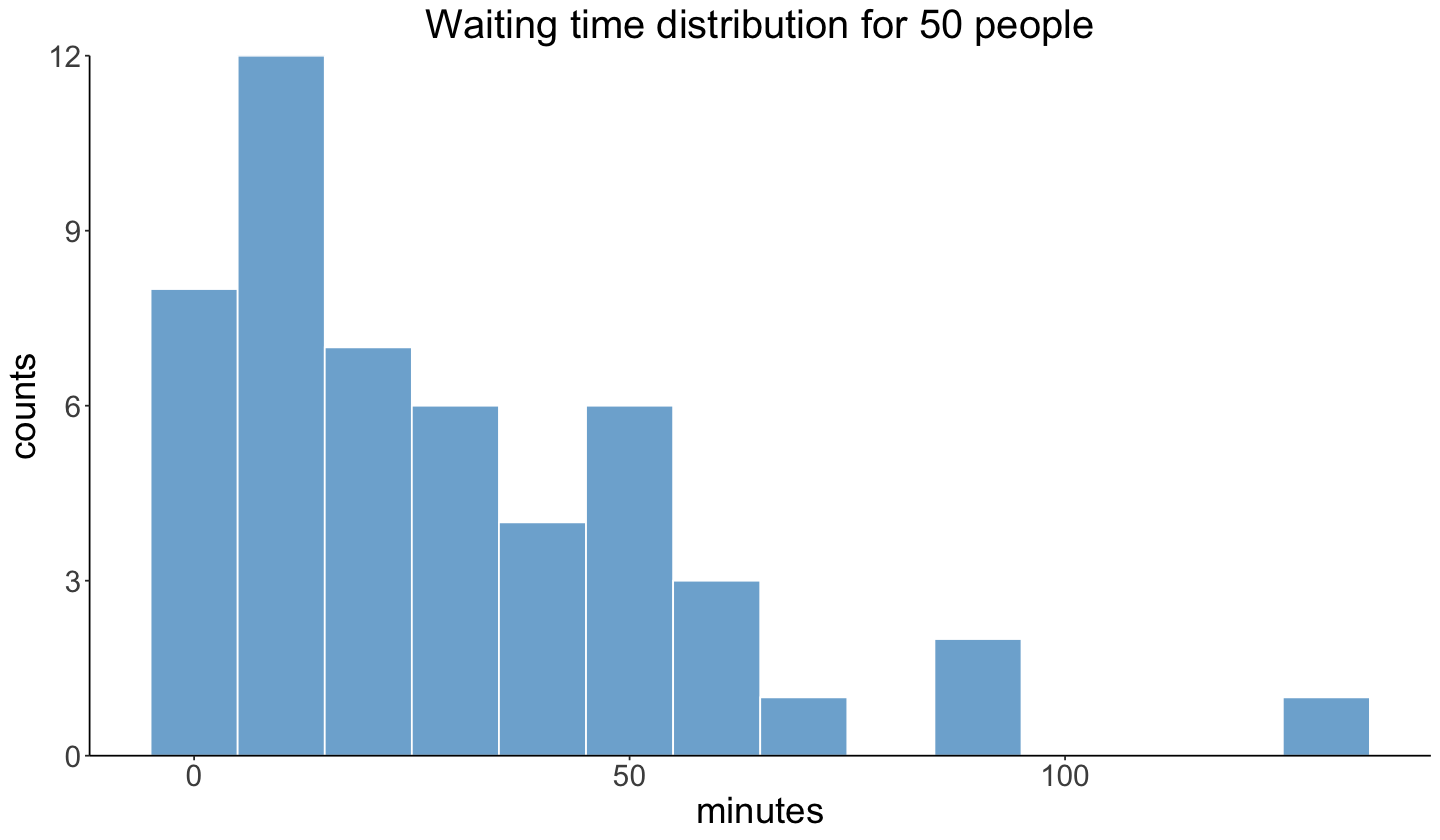

In [4]:
# exercise informations
w_time   <- 30 # min
lambda   <- 1 / 30
n_people <- 50

rvariates <- rexp(n_people, rate = lambda)

plt <- ggplot() +
geom_histogram(
    aes(x = rvariates),
    binwidth = 10,
    fill     = colors[2],
    color    = "white"
) +
theme_classic() +
theme(
    plot.title   = element_text(size=fontsize+2, hjust = 0.5),
    axis.title   = element_text(size=fontsize),
    axis.text    = element_text(size=fontsize-4),
) +
labs(
    title = "Waiting time distribution for 50 people",
    x     = "minutes",
    y     = "counts",
) + 
scale_y_continuous(limits = c(0, NA), expand = c(0, NA)) +
scale_x_continuous(breaks = pretty_breaks())

plt

## B) 

To compute the probability that a person will wait for less than 10 minutes we use the cumulative `pexp(q=10, rate=1/30)` to integrate the probability over all minutes from 0 to 10. 

In [5]:
q <- 10 # maximum waiting time in minutes

# probability that a person will wait for less than 10 minutes
p_10min <- pexp(q=10, rate = lambda)

cat(glue("The probability that a person will wait for less than 10 minutes is {round(p_10min*100,2)}%"))

The probability that a person will wait for less than 10 minutes is 28.35%

## C)

The average waiting time, computed from simulated data, is simply the mean of our data sample. 

We then compare the mean of our data sample to both the theoretical expectation, namely E[X]=1/$\lambda$, and the precise computation of the expected value as

$$
E[X] = \int_0^\infty x\,p(x)\,\,dx
$$

using R functions such as the `integrate` function to compute the integral and `dexp(x, rate=1/3)` as probability density function. Note that it is necessary to exploit anonymous functions to carry out the integration, as `dexp(x, rate=1/3)` cannot be directly passed to the `integrate` function.

In [6]:
# mean of our dataset of simulated waiting times
avg_wtime  <- mean(rvariates)

# theoretical expectation
th_exp_val <- 1 / lambda

# precise computation
exp_val <- integrate(
    function(x) {x * dexp(x, rate = lambda)},
    lower = 0, upper = Inf
)$value


cat("1. Average from simulated data : ", avg_wtime,  "\n")
cat("2. Theoretical expectation     : ", th_exp_val, "\n")
cat("3. Precise computation         : ", exp_val,    "\n")

1. Average from simulated data :  29.18865 
2. Theoretical expectation     :  30 
3. Precise computation         :  30 


## D)

The probability for waiting more than one hour, that is 60 minutes adopting our time unit, before being received can be computed as 1 minus the cumulative probability of waiting times up to 60 minutes.

In [7]:
# probability for waiting more than one hour before being received
p_1h <- 1 - pexp(q=60, rate = lambda)
cat(glue("The probability for waiting more than one hour before being received is {round(p_1h*100,2)}%"))

The probability for waiting more than one hour before being received is 13.53%

---

# Exercise 3

Let’s suppose that on a book, on average, there is one typo error every three pages. If the number of errors follows a Poisson distribution, plot the pdf and cdf, and calculate the probability that there is at least one error on a specific page of the book.

The intensity of the process is 1/3 as, on average, there is one typo every three pages. Setting the "time" step to be 1 page, the $\lambda=rT=np$ parameter of the Poisson distribution is exactly 1/3. 

We plot the probability density function using `dpois(x, lambda=1/3)` and the cumulative density function with `ppois(q, lambda=1/3)` where `x` represents the number of typos on a given page.

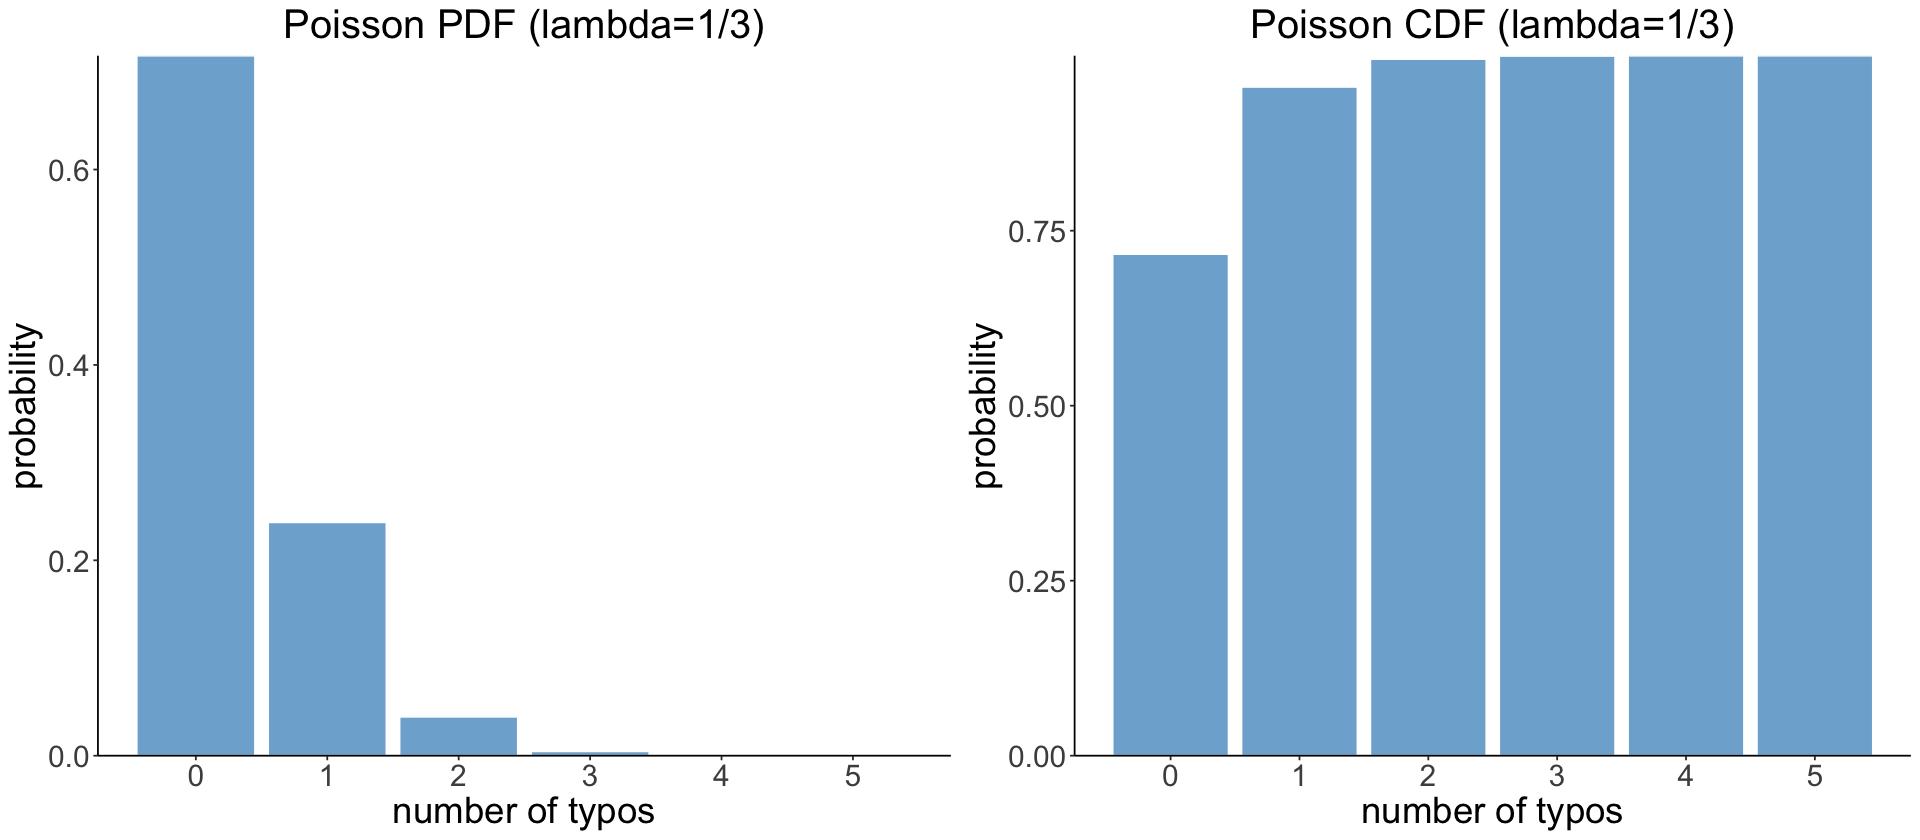

In [8]:
# lambda (I'm actually used to calling it mu..)
mu <- 1 / 3

# number of typos
x   <- c(0:5)

# compute pdf and cdf
pdf <- dpois(x, lambda = mu)
cdf <- ppois(x, lambda = mu)

# PDF PLOT
plt1 <- ggplot() +
geom_col(aes(x = x, y = pdf), fill=colors[2], color="white")+
theme_classic() + 
theme(
    plot.title   = element_text(size=fontsize+2, hjust = 0.5),
    axis.title   = element_text(size=fontsize),
    axis.text    = element_text(size=fontsize-4),
) +
labs(
    title = "Poisson PDF (lambda=1/3)",
    x     = "number of typos",
    y     = "probability",
) + 
scale_y_continuous(limits = c(0, NA), expand = c(0, NA)) + 
scale_x_continuous(breaks = pretty_breaks())

# CDF PLOT
plt2 <- ggplot() +
geom_col(aes(x = x, y = cdf), fill=colors[2], color="white")+
theme_classic() + 
theme(
    plot.title   = element_text(size=fontsize+2, hjust = 0.5),
    axis.title   = element_text(size=fontsize),
    axis.text    = element_text(size=fontsize-4),
) +
labs(
    title = "Poisson CDF (lambda=1/3)",
    x     = "number of typos",
    y     = "probability",
) + 
scale_y_continuous(limits = c(0, NA), expand = c(0, NA)) + 
scale_x_continuous(breaks = pretty_breaks())

plots <- list(plt1, plt2)

options(repr.plot.width=16, repr.plot.height=7)
grid.draw(ggarrange(plotlist=plots, widths=c(1,1)))
options(repr.plot.width=std_width, repr.plot.height=std_height)

To compute the probability that there is *at least* one error on a specific page, we simply compute the probability that there are no errors and subtract that value from one.

In [9]:
# probability that there is at least one error on a specific page
p_1 <- 1 - ppois(0, lambda = mu)

cat(glue("The probability that there is at least one error on a specific page is {round(p_1*100,2)}%"))

The probability that there is at least one error on a specific page is 28.35%

---

# Exercise 4

We randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. Calculate the probability that at least 10 draws are needed.

In a deck of 52 cards there are 4 aces. Thus, the probability of drawing an ace is $p=4/52$. The probability that at least 10 draws are needed means that we need at least 9 failures before drawing an ace. Since we are actually looking for the probability of having the *first* success after $n=10$ trials, we can exploit the negative binomial distribution.

**However**, the negative binomial distribution, although a correct choice, is quite an overkill here. Since we are looking for the *first* (and not the *r*-th) success after $n=10$ trials, we could simply use a geometric distribution! As a matter of fact, setting $r=1$ in the negative binomial distribution leads to the geometric distribution. Thus, the two choices are perfectly equivalent. 

The result is computed through the geometric distribution using the `pgeom(q, prob=4/52)` R function, where `q` is the number of *failures* in a sequence of Bernoulli trials before success occurs. Since we need the probability that at least 10 draws are needed, we set the number of failures $q=9$ and compute such probability as 1 minus the cumulative distribution from 0 to 9 failures. This way, we get the integrated probability for 10 draws or more. 

In [10]:
# exercise parameters
n_cards <- 52
n_aces  <- 4

# probability of drawing an ace
p <- n_aces / n_cards

# probability that at least 10 draws are needed
p_10 <- 1 - pgeom(9, p)

cat(glue("The probability that at least 10 draws are needed before drawing an ace from a deck of 52 cards is {round(p_10*100,2)}%"))

The probability that at least 10 draws are needed before drawing an ace from a deck of 52 cards is 44.91%

---

# Exercise 5

The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form

$$
    f(X) = 
    \begin{cases}
        c\,(t-1)(2-t) & \,\,\,\, \text{if} \,\, 1 < t < 2 \\
        0 & \,\,\,\, \text{otherwise}
    \end{cases}
$$

where $t$ is the time in hours.

A) Using the `integrate()` R function, determine the constant $c$ (and verify it analytically).

B) Write the set of four R functions and plot the pdf and cdf, respectively.

C) Evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take 90 and 120 minutes.

## A)

To determine the normalization constant we adopt the following procedure.

$$
    1 = \int_{-\infty}^{+\infty} f(X)\,dx = \int_{1}^{2} c\,(t-1)(2-t)\,dt = c\, \int_{1}^{2} (t-1)(2-t)\,dt
$$
$$  
    \Longrightarrow\,\,\,\,c = \frac{1}{\int_{1}^{2} (t-1)(2-t)\,dt}
$$

Thus, we simply need to compute the integral $\int_{1}^{2} (t-1)(2-t)\,dt$ using the `integrate()` R function.

In [11]:
# function to compute the normalization constant
f <- function(x) {
    return(
        ifelse(
            x < 2 & x > 1,
            (x - 1) * (2 - x),
            0
        )
    )
}

c <- 1 / integrate(f, 1, 2)$value

cat(glue("The normalization constant is {round(c, 2)}"))


The normalization constant is 6

## B)

1.  PDF: `df(x)` &rarr; simply the function written in point A) with the right normalization constant $c=6$. 
2.  CDF: `pf(q)` &rarr; the integral of the PDF from minus infinity to some quantile $q$.
3.  Quantile function: `qf(p)` &rarr; the inverse cumulative distribution.
4.  Sampling function: `rf(n)` &rarr; random sample generating function using the inverse transform method.

In [12]:
# pdf
df <- function(t) {
    return(
        ifelse(
            t < 2 & t > 1,
            6 * (t - 1) * (2 - t),
            0
        )
    )
}

# cdf
pf <- function(q) {
    return(
        ifelse(
            q < 2 & q > 1,
            -6  * (q^3 / 3 - 3 * q^2 / 2 + 2 * q) + 5,
            ifelse(
                q >= 2,
                1,
                0
            )
        )
    )
}

# quantile function
qf <- function(p) {
    return(
        ifelse(
            p <= 1 & p >= 0,
            uniroot(
                function(x) {
                    return(
                        pf(x) - p
                    )
                },
                lower = 1, upper = 2
            )$root,
            "ERROR: probability must be between 0 and 1!"
        )
    )
}

# sampling function
rf <- function(n) {
    return(
        to_vec(
            for (p in runif(n)) qf(p)
        )
    )
}

Let us now plot the PDF and CDF using `df(x)` and `pf(q)` respectively.

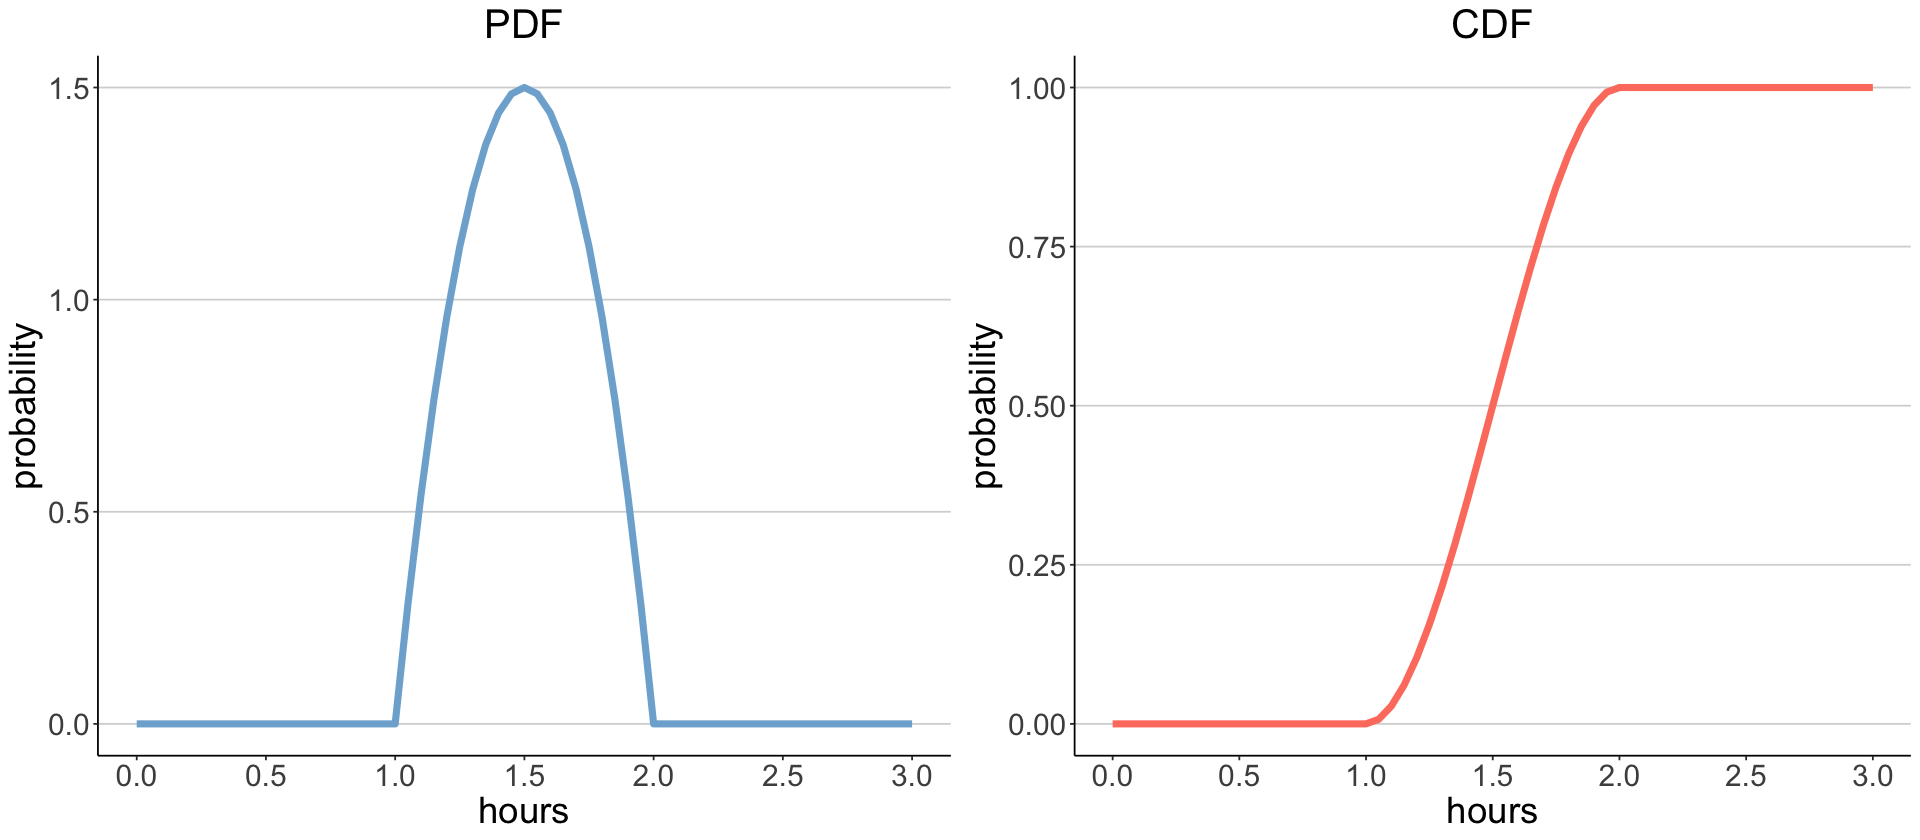

In [13]:
x <- seq(0, 3, 0.05)
pdf <- df(x)
cdf <- pf(x)


# PDF PLOT
plt1 <- ggplot() +
geom_line(aes(x = x, y = pdf), color = colors[2], size = 2) +
theme_classic() +
theme(
    plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
    axis.title   = element_text(size = fontsize),
    axis.text    = element_text(size = fontsize - 4),
    panel.grid.major.y = element_line(
        color    = alpha("black",0.2),
        size     = 0.5,
        linetype = 1
    )
) +

labs(
    title = glue("PDF"),
    x     = "hours",
    y     = "probability",
) +
scale_y_continuous(limits = c(0, NA)) +
scale_x_continuous(breaks = pretty_breaks())


# CDF PLOT
plt2 <- ggplot() +
geom_line(aes(x = x, y = cdf), color = colors[1], size = 2) +
theme_classic() +
theme(
    plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
    axis.title   = element_text(size = fontsize),
    axis.text    = element_text(size = fontsize - 4),
    panel.grid.major.y = element_line(
        color    = alpha("black",0.2),
        size     = 0.5,
        linetype = 1
    )
) +
labs(
    title = glue("CDF"),
    x     = "hours",
    y     = "probability",
) + 
scale_y_continuous(limits = c(0, NA)) +
scale_x_continuous(breaks = pretty_breaks())


# plotting

plots <- list(plt1, plt2)

options(repr.plot.width = 16, repr.plot.height = 7)
grid.draw(ggarrange(plotlist = plots, widths = c(1, 1)))
options(repr.plot.width = std_width, repr.plot.height = std_height)


## C)

To evaluate the probability that the student will finish the aptitude test in more than 75 minutes we use the cumulative density function, in particular this probability is 1 minus the cumulative distribution at $q=75$ minutes, converted in hours.

To compute the probability that the student will finish between 90 and 120 minutes, knowing the shape of the probability density function, is one minus the CDF at $q=90$ minutes, converted in hours.

In [18]:
min_to_hours <- 1 / 60

minutes <- 75
hours   <- minutes * min_to_hours

p75 <- 1 - pf(hours)

cat("\n", glue("The probability that the student will finish the aptitude test in more than 75 minutes is {round(p75*100,2)}%"))

minutes <- 90
hours   <- minutes * min_to_hours

p90_120 <- 1 - pf(1.5)

cat("\n", glue("The probability that the student will finish the aptitude test between 90 and 120 minutes is {round(p90_120*100,2)}%"))


 The probability that the student will finish the aptitude test in more than 75 minutes is 84.37%
 The probability that the student will finish the aptitude test between 90 and 120 minutes is 50%

---

# Exercise 6

The lifetime of tires sold by an used tires shop is $104 \cdot x$ km, where $x$ is a random variable following the distribution function

$$
    g(X) = 
    \begin{cases}
        2/x^2 & \,\,\,\,\text{if}\,\, 1 < x < 2 \\
        0 & \,\,\,\,\text{otherwise}
    \end{cases}
$$

A) Write the set of four R functions and plot the pdf and cdf, respectively.

B) Determine the probability that tires will last less than 15000 km.

C) Sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression $Var(X) = E[X^2] − E[X]^2$

## A)

1.  PDF: `dg(x)` &rarr; simply the function that discribes the distribution of $x$. 
2.  CDF: `pg(q)` &rarr; the integral of the PDF from minus infinity to some quantile $q$.
3.  Quantile function: `qg(p)` &rarr; the inverse cumulative distribution.
4.  Sampling function: `rg(n)` &rarr; random sample generating function using the inverse transform method.

In [ ]:
# pdf
dg <- function(x) {
    return(
        ifelse(
            x < 2 & x > 1,
            2 / x^2,
            0
        )
    )
}

# cdf
pg <- function(q) {
    return(
        ifelse(
            q < 2 & q > 1,
            -2 / q + 2,
            ifelse(
                q >= 2,
                1,
                0
            )
        )
    )
}

# quantile function
qg <- function(p) {
    return(
        ifelse(
            p <= 1 & p >= 0,
            uniroot(
                function(x) {
                    return(
                        pg(x) - p
                    )
                },
                lower = 1, upper = 2
            )$root,
            "ERROR: probability must be between 0 and 1!"
        )
    )
}

# sampling function
rg <- function(n) {
    return(
        to_vec(
            for(p in runif(n)) qg(p)
        )
    )
}

Let us now plot the PDF and CDF using `dg(x)` and `pg(q)` respectively.

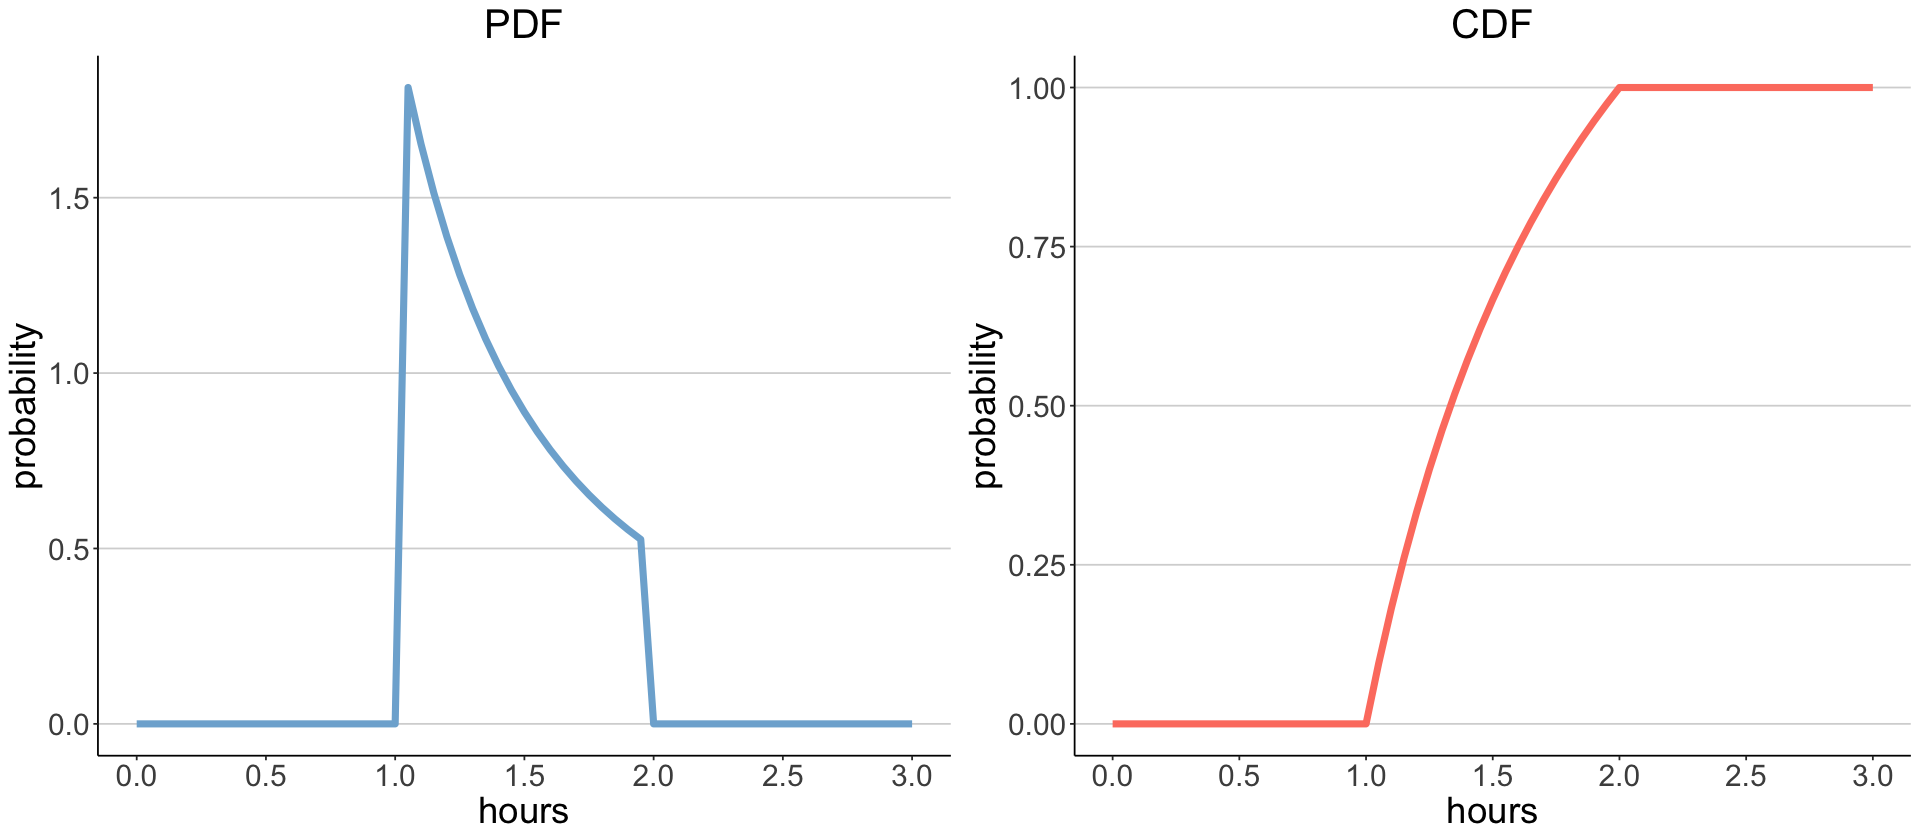

In [ ]:
x <- seq(0, 3, 0.05)
pdf <- dg(x)
cdf <- pg(x)


# PDF PLOT
plt1 <- ggplot() +
geom_line(aes(x = x, y = pdf), color = colors[2], size = 2) +
theme_classic() +
theme(
    plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
    axis.title   = element_text(size = fontsize),
    axis.text    = element_text(size = fontsize - 4),
    panel.grid.major.y = element_line(
        color    = alpha("black",0.2),
        size     = 0.5,
        linetype = 1
    )
) +

labs(
    title = glue("PDF"),
    x     = "hours",
    y     = "probability",
) +
scale_y_continuous(limits = c(0, NA)) +
scale_x_continuous(breaks = pretty_breaks())


# CDF PLOT
plt2 <- ggplot() +
geom_line(aes(x = x, y = cdf), color = colors[1], size = 2) +
theme_classic() +
theme(
    plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
    axis.title   = element_text(size = fontsize),
    axis.text    = element_text(size = fontsize - 4),
    panel.grid.major.y = element_line(
        color    = alpha("black",0.2),
        size     = 0.5,
        linetype = 1
    )
) +
labs(
    title = glue("CDF"),
    x     = "hours",
    y     = "probability",
) + 
scale_y_continuous(limits = c(0, NA)) +
scale_x_continuous(breaks = pretty_breaks())


# plotting

plots <- list(plt1, plt2)

options(repr.plot.width = 16, repr.plot.height = 7)
grid.draw(ggarrange(plotlist = plots, widths = c(1, 1)))
options(repr.plot.width = std_width, repr.plot.height = std_height)

## B)

To compute the probability that tires will last less than 15'000 km translates in finding the probability that $x$ is less than $1.5$. We can both integrate the PDF from minus infinity (from 1 since it is zero for $x<=1$) to $x=1.5$ and evaluate the CDF at $q=1.5$.

In [ ]:
p1.5d <- integrate(dg, 1, 1.5)$value
p1.5p <- pg(1.5)

# we print the result only if the two methods lead to the same value
# though, we need to take into account numeric approximations and thus we cannot use "=="
if (all.equal.numeric(p1.5d, p1.5p)) {
    cat(glue("The probability that tires will last less than 15'000 km is {round(p1.5d*100,2)}%"))
}

The probability that tires will last less than 15'000 km is 66.67%

## C)

To sample 3000 random variables we can use the `rg(n)` function. To compute mean and variance of the data sample we can use several methods. We can also compute the expected quantities from the distribution itself (both using R and using pen and paper... though I will stick with R).

In [ ]:
# expected value
exp_th <- integrate(
    function(x) {x * dg(x)},
    lower = 1, upper = 2
)$value

# 2nd moment
sec_th <- integrate(
    function(x) {x^2 * dg(x)},
    lower = 1, upper = 2
)$value

# variance
var_th <- sec_th - exp_th^2


N <- 3000

# sample N random instances
x <- rg(n = N)

# compute mean 
avg <- sum(x) / N 
# compute variance
var <- sum(x^2) / N - avg^2

cat(glue("Expected mean:     {round(exp_th, 4)}"), "\n")
cat(glue("Expected variance: {round(var_th, 4)}"), "\n\n")
cat(glue("Sample mean:     {round(avg, 4)}"), "\n")
cat(glue("Sample variance: {round(var, 4)}"), "\n")

Expected mean:     1.3863 
Expected variance: 0.0782 

Sample mean:     1.3805 
Sample variance: 0.0776 


---

# Extra exercise - defective screws

A company produces screws. The probability of a screw to be defective is $p=0.015$. A box with $n=100$ screws is packaged.

A) Compute the probability that all screws are non-defective.

B) Plot the defective screws distribution comparing the Binomial and Poisson distributions.

C) How many extra screws should the box contain in order to have $n=100$ non defective screws with probability greater than $80%$?

## A)

The probability that all screws are non-defective is the probability of having 0 defective screws is a 100 screws sample. Therefore, knowing the probability of a screw to be defective, we can use the `dbinom` R function and find the probability of finding 0 defective screws.

In [ ]:
prob     <- 0.015
n_screws <- 100
screws   <- 0:7

# probability that 0 screws are defective
p_0 <- dbinom(0, n_screws, prob)

cat(glue("The probability that all screws are non-defective is {round(p_0*100, 2)}%"))

The probability that all screws are non-defective is 22.06%

## B)

To compare the binomial distribution with the poisson distribution we need to compute the $\lambda = np$ parameter of the poisson distribution.

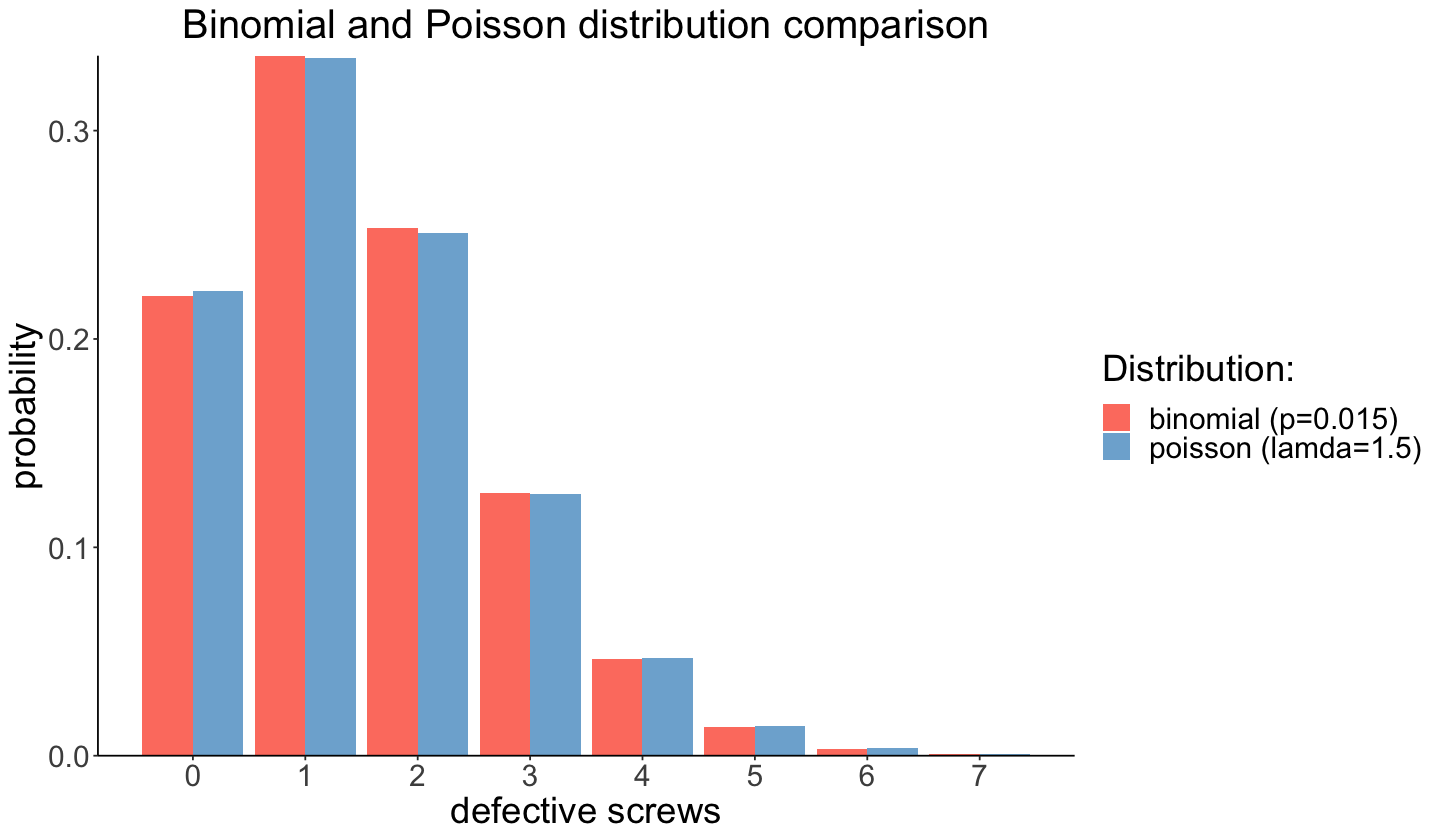

In [ ]:
# poisson lambda parameter
mu <- n_screws * prob

binom <- dbinom(screws, n_screws, prob)
poiss <- dpois(screws, mu)

# data manipulation to build the plot
dist <- tibble("screws" = screws, "binom" = binom, "pois" = poiss)
df   <- dist %>% pivot_longer(cols = -screws, names_to = "dist")

plt <- ggplot(data = df) +
geom_col(aes(x = screws, y = value, fill = dist), position = "dodge") +
theme_classic() +
theme(
    plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
    axis.title   = element_text(size = fontsize),
    axis.text    = element_text(size = fontsize - 4),
    legend.title = element_text(size = fontsize),
    legend.text  = element_text(size = fontsize - 4),
) +
labs(
    title = "Binomial and Poisson distribution comparison",
    x     = "defective screws",
    y     = "probability",
) + 
scale_y_continuous(limits = c(0, NA), expand = c(0, NA)) +
scale_x_continuous(breaks = screws) +
scale_fill_manual(
    name   = "Distribution:",
    labels = c(glue("binomial (p={prob})"), glue("poisson (lamda={mu})")),
    values = c(colors[1], colors[2])
)

plt

For this particular set of parameters ($p$, $n$ and consequently $\lambda$) the two distributions are extremely similar.

## C)

To compute how many extra screws are needed to have 100 non defective screws with probability greater than 80% we use the negative binomial distribution. We look for the probability of finding the 100th success after a variable number of failures and select the correct number of failures (i.e. the number of defective screws). 

To do that we need to use as probability $1-p$ as we need the probability of being non-defective! 

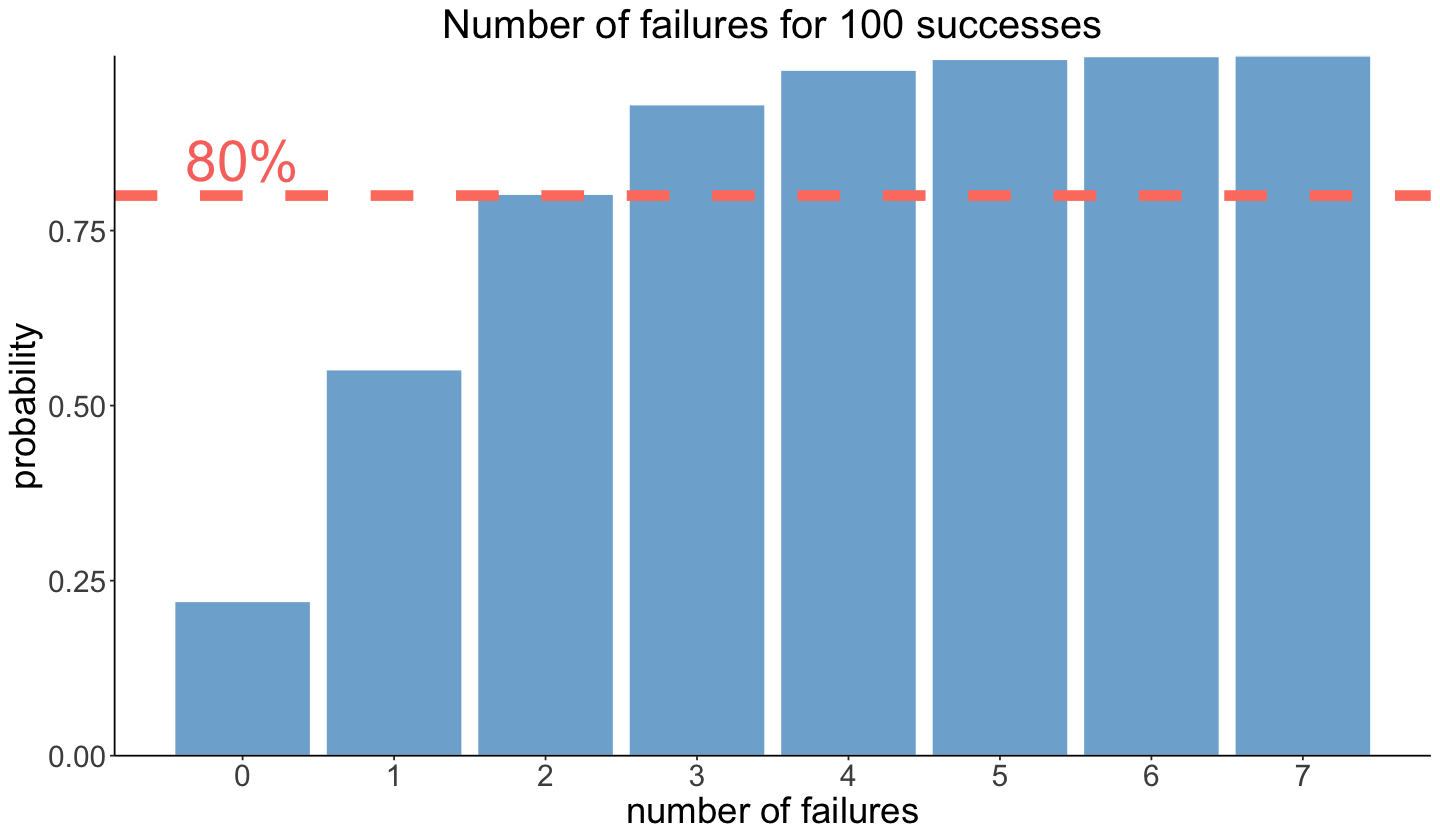

In [ ]:
nd_screws  <- 100
n_failures <- 0:7

p <- pnbinom(n_failures, nd_screws, 1 - prob)

# plot
plt <- ggplot() +
geom_col(aes(x = n_failures, y = p), fill = colors[2], color = "white") +
theme_classic() +
theme(
    plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
    axis.title   = element_text(size = fontsize),
    axis.text    = element_text(size = fontsize - 4),
    legend.position = "none"
) +
labs(
    title = "Number of failures for 100 successes",
    x     = "number of failures",
    y     = "probability",
) +
scale_y_continuous(limits = c(0, NA), expand = c(0, NA)) +
scale_x_continuous(breaks = n_failures) +
geom_hline(yintercept = 0.8, linetype = "dashed", color = colors[1], size = 3) +
geom_text(aes(x = 0, y = 0.85, label = "80%", color = colors[1]), size = 12)

plt

As we can see in the figure above, at least 2 extra screws are needed to have n = 100 non-defective screws with probability greater than 80%.